# Final Project Help Session

## Task 1: Load the Data
1. There's no need to split the data, because the training and test datasets are already stored in different csv files. All you need is to pick up the correct columns in two dataframes.

2. In the EMNIST data, the label ranges from 1 to 26 instead of 0 to 25. The logistic regression codes provided in lecture note/discussion files might be sensitive to this and some adjustments might be needed if you choose this data. No problem for fashion-MNIST data.

## Task 2 and 3: Logistic Regression and PCA

Read the lecture notes and discussion files thoroughly and you'll find the right codes. It's no problem if you adopt our codes, fully understand them, write your own document strings and apply them correctly in the final project.

## Task 4: Scikit Learn

This should be straightforward as long as you do the homework every week. The only reminder is about the description paragraph. If just intended to fullfill the basic requirments, you can actually refer to the relevant paragraphs in our lecture notes/discussion files, and rephrase them. To get more points in task 6, consulting more materials like wikipedia or reference might be needed.

## Task 5: Other Models

There's no problem if you still want to use sklearn in this task, while the requirements might be more demanding due to the description paragraph and more models you have to write. If you use other packages other than sklearn, you don't need to write the separate markdown paragraphs -- correct codes (perhaps some necessary in-line comments) and results are enough.

Especially, cuml will require the use of GPU, and Pycaret/TensorFlow/Pytorch can be boosted with GPU (although not mandatory). It's recommended to run cuml and Pycaret-GPU in Kaggle notebooks instead of Google Colab, because cuml is pre-installed there and the installation is not easy in Google Colab.

Below I will show the very basic usage of GPU with the MNIST data provided in discussion 16. You can open this ipynb file in Kaggle.

1. Create a new notebook in Kaggle. Turn on the GPU accelerator.
2. Upload and open the ipynb file in Kaggle.
3. Click "add data" button in the right corner, and upload the dataset.

In [1]:
import numpy as np
folder_dir = '../input/mnistnpz/'
#folder_dir = './'
data_train = np.load(folder_dir+'mnist_train.npz')
data_test = np.load(folder_dir+'mnist_test.npz')
X_train = data_train['X']
y_train = data_train['y']
X_test = data_test['X']
y_test = data_test['y'] 

In [1]:
!nvidia-smi

/bin/bash: nvidia: command not found


In [2]:
%%time
from cuml import LogisticRegression
clf_cuml = LogisticRegression()
clf_cuml.fit(X_train,y_train)
clf_cuml.score(X_test,y_test)

[W] [09:25:11.074815] L-BFGS: max iterations reached
CPU times: user 9.73 s, sys: 1.75 s, total: 11.5 s
Wall time: 16.5 s


0.9204999804496765

CPU times: user 897 ms, sys: 697 ms, total: 1.59 s
Wall time: 1.59 s


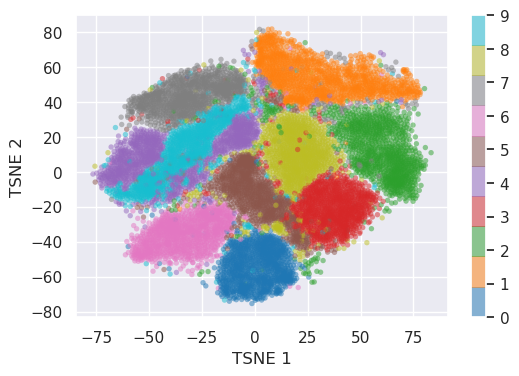

In [4]:
%%time
from cuml import TSNE
tsne_cuml = TSNE()
X_tsne = tsne_cuml.fit_transform(X_test)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

In the meantime, I will run the sklearn in google colab for a comparison

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_dir = '/content/drive/My Drive/Colab Notebooks/data/'
data_train = np.load(folder_dir+'mnist_train.npz')
data_test = np.load(folder_dir+'mnist_test.npz')
X_train = data_train['X']
y_train = data_train['y']
X_test = data_test['X']
y_test = data_test['y'] 

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
clf_sk = LogisticRegression()
clf_sk.fit(X_train,y_train)
clf_sk.score(X_test,y_test)

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne_sk = TSNE()
X_tsne = tsne_sk.fit_transform(X_test)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

For PyCaret, it also supports GPU (calling cuml instead of sklearn, and use the gpu version of lightgbm)

In [5]:
pip install pycaret

     |████████████████████████████████| 261 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 54.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 56.0 MB/s eta 0:00:01


     |████████████████████████████████| 77 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.6 MB/s  eta 0:00:01


  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=0301180baa716501afe491b652d98629867d42afe5f9e862307a166d7e2b8de8
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.2-py3-none-any.whl size=100732 sha256=d727f3cd443354514c744af757d26ae4c789c9879ebde645769696b7236a4ed7
  Stored in directory: /root/.cache/pip/wheels/54/8a/cd/8861fff0bea4a752ffe7561eb74e130c9ae38cdb7e43eb7b66
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17158 sha256=422572c627ab15006653cfab06ff42799b43acc0dfde53f7b65ae55d760a83af
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a3a226565e27f0a7eb7a3ac93c3f4d68acfbe617
  Created wheel for pyod: filename=pyod-0.8.7-py3-none-any.whl size=115977 sha256=61743941046b8b25b48054ffe1cf70fc8bad893645907601fe4e64567b9e865f
  Stored in direct

In [6]:
pip uninstall lightgbm -y

Found existing installation: lightgbm 3.1.1
Uninstalling lightgbm-3.1.1:
  Successfully uninstalled lightgbm-3.1.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

/opt/conda/lib/python3.7/site-packages/pip/_internal/commands/install.py:230: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 588 kB 5.2 MB/s eta 0:00:01
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
train_df = pd.DataFrame(np.concatenate([X_train,y_train.reshape(-1,1)],axis = 1))
train_df.columns = list(range(784))+['label']
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [10]:
from pycaret.classification import *
clf = setup(train_df, target = 'label', use_gpu = True)

,Description,Value
0,session_id,8141
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(60000, 785)"
5,Missing Values,False
6,Numeric Features,761
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [11]:
models(internal=True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,True
knn,K Neighbors Classifier,True
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,True
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,True


In [12]:
best_model = compare_models(include = ['lr','knn','rf','lightgbm']) # use include to select some models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9740,0.9994,0.9739,0.9740,0.9740,0.9710,0.9711,71.1880
knn,K Neighbors Classifier,0.9682,0.9951,0.9678,0.9685,0.9681,0.9646,0.9647,0.7610
rf,Random Forest Classifier,0.9576,0.9978,0.9573,0.9577,0.9576,0.9529,0.9529,5.1550
lr,Logistic Regression,0.9042,0.9902,0.9031,0.9042,0.9041,0.8936,0.8936,3.0960
